In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("datasets_14872_228180_Admission_Predict.csv")
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [3]:
df.columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'ChanceofAdmit']

In [4]:
df = df.set_index('Serial No.')

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in doubl

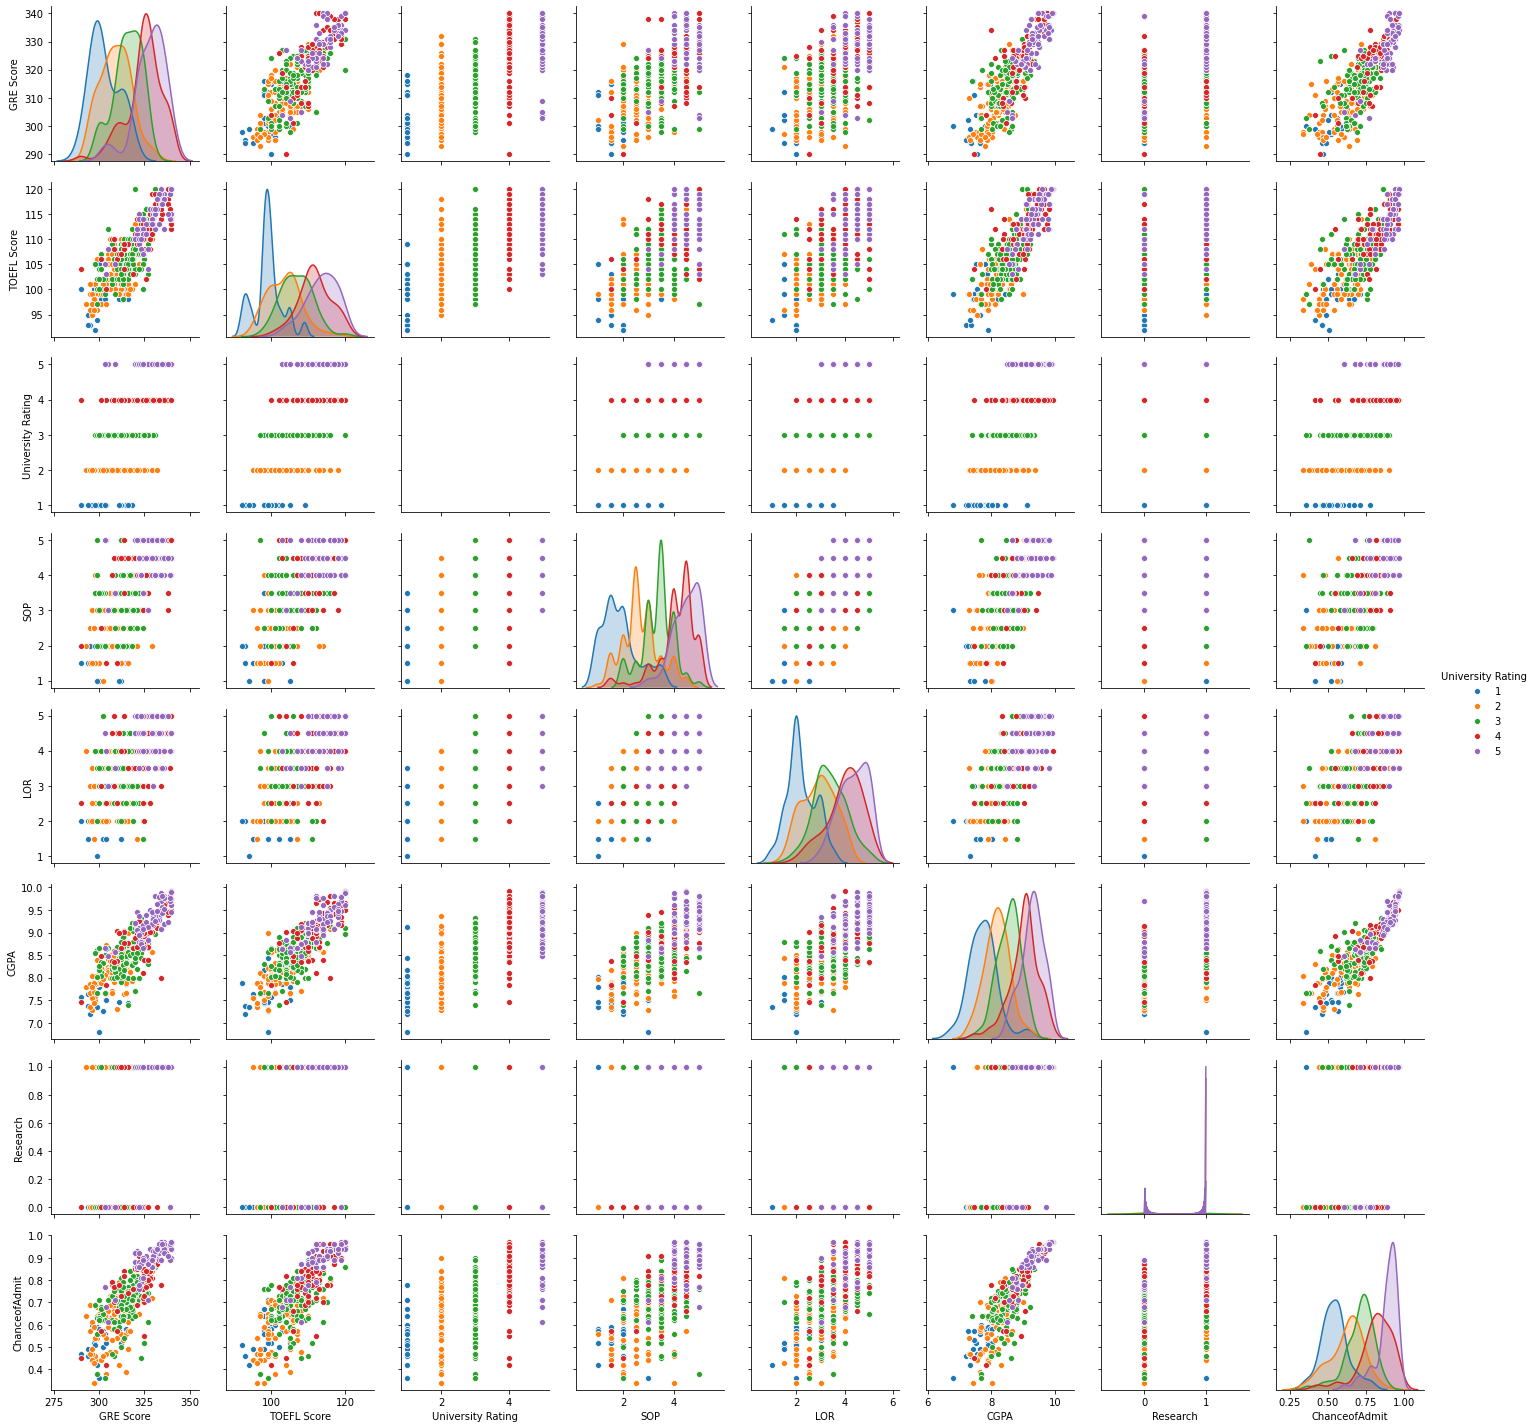

In [28]:
sns.pairplot(df,hue="University Rating")

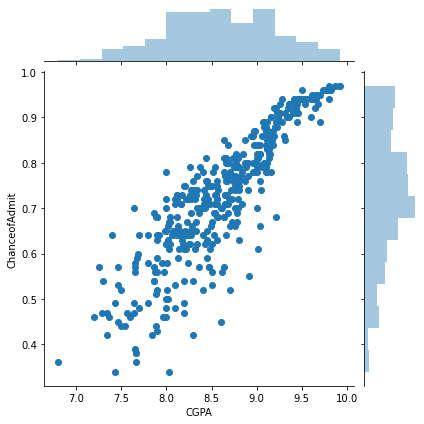

In [5]:
sns.jointplot(x=df["CGPA"],y=df["ChanceofAdmit"])

In [6]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
ChanceofAdmit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(["ChanceofAdmit"],axis="columns"),df.ChanceofAdmit,test_size=.2)
model = LinearRegression()

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8551123284174514

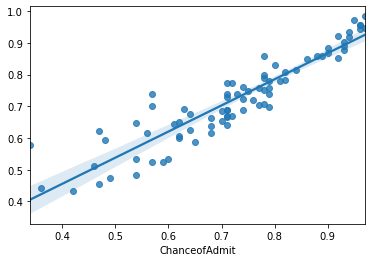

In [46]:
sns.regplot(x=y_test,y=model.predict(X_test))

In [47]:

import pickle 

saved_model = pickle.dumps(model)

In [48]:
sm = pickle.loads(saved_model)
sm.predict(X_test)

array([0.69817026, 0.84992559, 0.89154342, 0.77950115, 0.75768908,
       0.52570905, 0.53403724, 0.59910457, 0.67503345, 0.68387343,
       0.70575161, 0.79715489, 0.73769364, 0.85985941, 0.64850911,
       0.5886967 , 0.94326565, 0.45429131, 0.90263376, 0.73794675,
       0.72169679, 0.81502115, 0.77383634, 0.68826118, 0.72046504,
       0.97103652, 0.66988574, 0.85978521, 0.73924069, 0.68728962,
       0.78157653, 0.93409965, 0.4325293 , 0.729173  , 0.78065793,
       0.66302966, 0.75812441, 0.52291793, 0.86650929, 0.61686908,
       0.59414329, 0.92212261, 0.74032774, 0.94832105, 0.77232146,
       0.67027777, 0.65454898, 0.64959786, 0.8091736 , 0.66507037,
       0.88298942, 0.48498902, 0.64302622, 0.95623486, 0.44326944,
       0.61447028, 0.82882862, 0.69087126, 0.75105232, 0.85110063,
       0.98396023, 0.60637413, 0.8574684 , 0.68867188, 0.74893772,
       0.76172881, 0.87816207, 0.91961556, 0.78772101, 0.47317343,
       0.63889191, 0.64184391, 0.62446571, 0.51180371, 0.69983

In [49]:
pickle.dump(model,open("Pickle.pkl","wb"))

In [ ]:
p